In [187]:
#importing libraries
import pandas as pd #importing Pandas
import numpy as np #importing Numpy
import seaborn as sns #importing Seaborn
import matplotlib.pyplot as plt #import Matlplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
     



In [188]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [189]:
data_set = "/content/seeds (2) (1).data.txt" 

In [190]:
df = pd.read_csv(data_set) #reading the given dataset

In [191]:
display(df) #displays the data present in the given dataset

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [192]:
df.head(10) #to display the first 10 values of the given dataset

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [193]:
df.info() # previewing the complete info of the gievn dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         210 non-null    float64
 1   Perimeter    210 non-null    float64
 2   Compactness  210 non-null    float64
 3   Length       210 non-null    float64
 4   Width        210 non-null    float64
 5   Asymmetry    210 non-null    float64
 6   Groove       210 non-null    float64
 7   Class        210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [194]:
df.shape # previewing the shape of the dataset (rows, columns)

(210, 8)

In [195]:
df.isna().sum() #calcuate the missing values count in each column of pandas dataframe(pandas library)


Area           0
Perimeter      0
Compactness    0
Length         0
Width          0
Asymmetry      0
Groove         0
Class          0
dtype: int64

In [196]:
df['Class'].value_counts() #count of each class type

1    70
2    70
3    70
Name: Class, dtype: int64

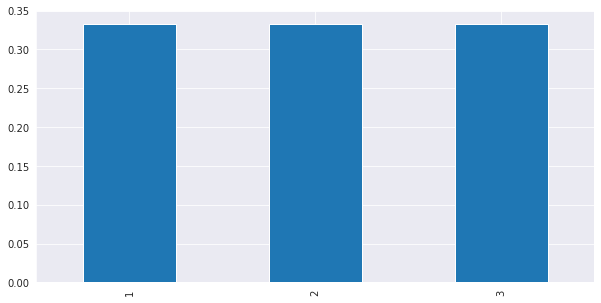

In [197]:
#visual analysis of the Class data count

#df['Class'].value_counts(normalize=True), function returns a Series that contains the count of each unique value in the "Class" column,
#plot.bar(), method is used to create a bar plot from the Series
df['Class'].value_counts(normalize=True).plot.bar()  
plt.show()   #function is used to display the plot              
plt.rcParams["figure.figsize"] = [10,5]  #used to set the size of the plot to 9 inches by 5 inches.

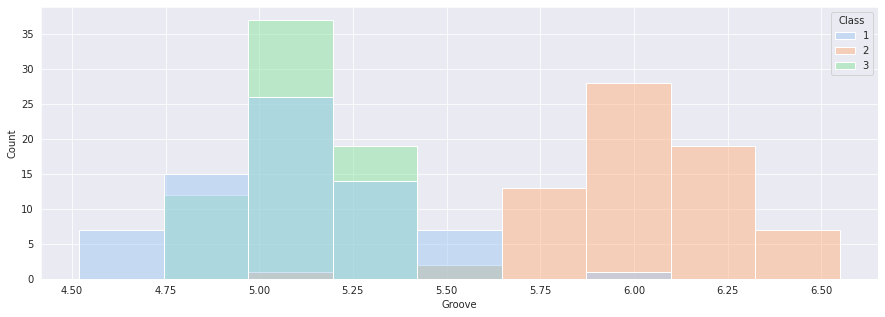

In [198]:
#Analysis of the Groove parameter of three classes
plt.figure(figsize=(15,5))        # resizing the graph
sns.histplot(data=df, x="Groove", hue="Class",palette='pastel')

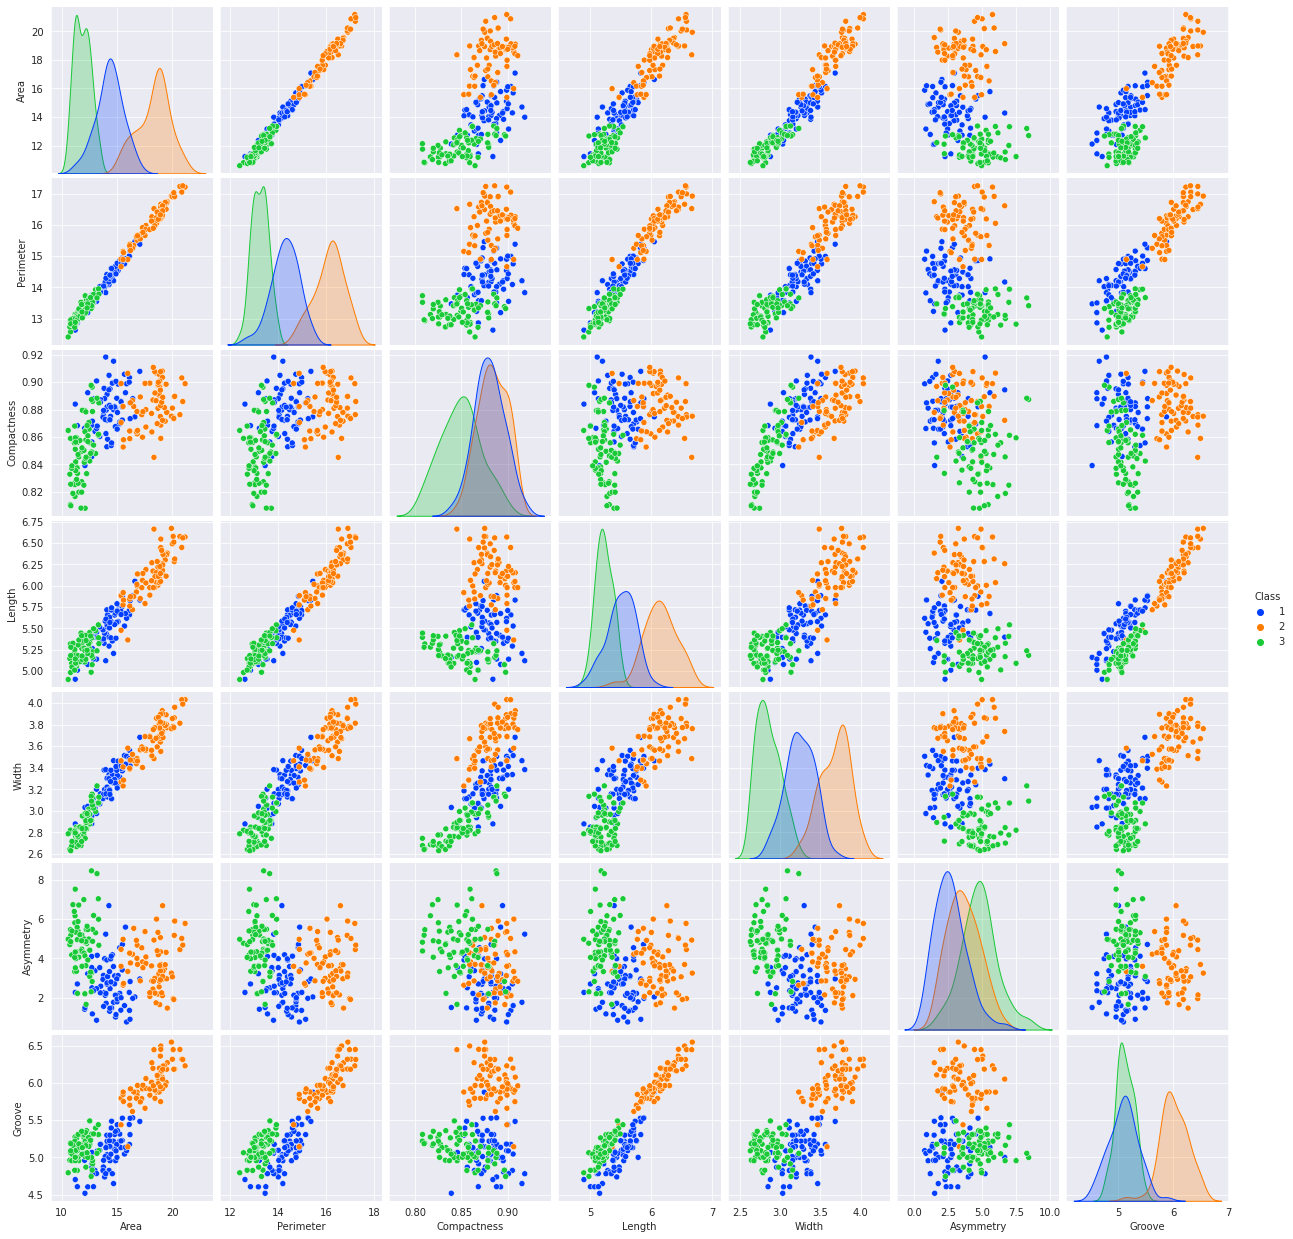

In [199]:
#the realtionship between the given parameters
sns.set_style('darkgrid')      # setting darkgrid background
ax = sns.pairplot(df, hue="Class",palette='bright')  # plotting pairplot for the dataset wrt label
plt.show()     

In [200]:
#Splitting data
x = df.drop('Class', axis = 1) #dropping class column

In [201]:
x

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [202]:
y = df['Class']

In [203]:
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: Class, Length: 210, dtype: int64

In [204]:
from sklearn.model_selection import train_test_split  

In [205]:
#splitting the data into train sets and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=123)


In [206]:
x_train

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove
161,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
127,17.98,15.85,0.8993,5.979,3.687,2.257,5.919
170,11.02,13.00,0.8189,5.325,2.701,6.735,5.163
165,12.10,13.15,0.8793,5.105,2.941,2.201,5.056
188,11.23,12.82,0.8594,5.089,2.821,7.524,4.957
...,...,...,...,...,...,...,...
17,15.69,14.75,0.9058,5.527,3.514,1.599,5.046
98,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
66,14.34,14.37,0.8726,5.630,3.190,1.313,5.150
126,18.65,16.41,0.8698,6.285,3.594,4.391,6.102


In [207]:
x_test

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove
173,11.40,13.08,0.8375,5.136,2.763,5.588,5.089
178,11.48,13.05,0.8473,5.180,2.758,5.876,5.002
182,12.19,13.36,0.8579,5.240,2.909,4.857,5.158
132,15.38,14.90,0.8706,5.884,3.268,4.462,5.795
190,10.93,12.80,0.8390,5.046,2.717,5.398,5.045
196,12.79,13.53,0.8786,5.224,3.054,5.483,4.958
199,12.76,13.38,0.8964,5.073,3.155,2.828,4.830
171,11.55,13.10,0.8455,5.167,2.845,6.715,4.956
95,16.87,15.65,0.8648,6.139,3.463,3.696,5.967
31,15.49,14.94,0.8724,5.757,3.371,3.412,5.228


In [208]:
y_train

161    3
127    2
170    3
165    3
188    3
      ..
17     1
98     2
66     1
126    2
109    2
Name: Class, Length: 168, dtype: int64

In [209]:
y_test

173    3
178    3
182    3
132    2
190    3
196    3
199    3
171    3
95     2
31     1
42     1
180    3
192    3
120    2
19     1
72     2
20     1
52     1
147    3
167    3
119    2
201    3
4      1
108    2
158    3
21     1
91     2
159    3
137    2
195    3
198    3
53     1
181    3
163    3
185    3
162    3
10     1
71     2
80     2
26     1
11     1
194    3
Name: Class, dtype: int64

In [210]:
#shapes of training and testing dataset
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((168, 7), (42, 7), (168,), (42,))

In [211]:
from sklearn.linear_model import LogisticRegression


In [212]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [213]:
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [214]:
y_predict = log_model.predict(x_test)

In [215]:
from sklearn.metrics import accuracy_score

In [216]:
print("\n Accuracy: {}".format(accuracy_score(y_test, y_predict) ))


 Accuracy: 0.9047619047619048


In [217]:
def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.03):
    
    # X = X.to_numpy()
    # y = y.to_numpy()
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  
     
  
     

    
  



    

In [218]:
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length',
            'Width',
            'Asymmetry',
            'Groove']

In [219]:
a = df.loc[:, features]
b = df.loc[:, 'Class']

X_train, X_test, y_train, y_test = train_test_split(
    a, b, test_size=0.3, random_state=1)

print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [46 52 49]
Labels counts in y_test: [24 18 21]


In [220]:
from matplotlib.colors import ListedColormap

predicted: [1 3 1 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 1 1 2 3 3 3 1 3 1 2 2 2 2 1 1 2 3
 2 1 3 3 3 2 3 2 2 3 3 2 3 2 3 2 2 1 1 3 3 3 3 2 1 2]
true class: [1 3 1 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 1 1 2 3 1 3 1 3 1 2 2 2 2 1 1 2 3
 2 1 3 1 3 2 3 2 2 3 3 2 3 2 3 2 2 1 1 3 3 1 3 2 1 2]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


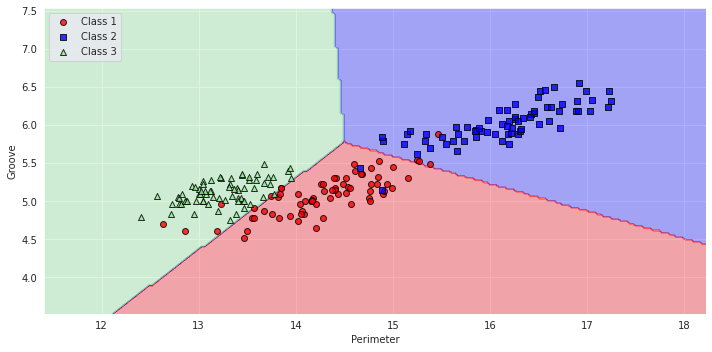

In [221]:
feature_1 = features[1]
feature_2 = features[6]

log_reg = LogisticRegression()
log_reg.fit(X_train.loc[:, [feature_1, feature_2]],
       y_train)

print('predicted:', log_reg.predict(X_test.loc[:, [feature_1, feature_2]]))
print('true class:', np.array(y_test))

plot_decision_region(X.loc[:, [feature_1, feature_2]].to_numpy(),
                      y, classifier=log_reg)

plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
     